# Perceptron implementation

In [9]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
    


In [10]:
class Perceptron:
    def __init__(self, input_length, activ_f, eta=0.1, epochs=1000):
        self.input_length = input_length
        self.eta = eta
        self.epochs = epochs
        #initialize random weights
        self.weights = np.random.normal(0, 1, input_length+1)
        self.activ_f = activ_f
        
        self.v_activ_f = np.vectorize(self.activ_f)

    
    def train(self, X, Y):
        
        #vector of errors
        error = np.zeros(len(X))
        E = 1
        t = 1
        while ( E != 0  or t <= self.epochs):
            for i in range(len(X)):
                out = self.activ_f(np.dot(self.weights[:-1], X[i]) + self.weights[-1])

                error[i] = Y[i] - out

                self.weights[:-1] = self.weights[:-1] + self.eta * error[i] * X[i]
                self.weights[-1] = self.weights[-1] + self.eta * error[i]
            
            E = np.sum(error**2)
            # print('sum of erros', E)
            t += 1
            
        self.trained_weights = self.weights
    def predict(self, X, Y):
        
        self.predicted = []
        for x in X:
            self.predicted = [self.activ_f(np.dot(self.trained_weights[:-1], x) + self.trained_weights[-1]) for x in X]
        
        self.accuracy = (len(Y) - np.count_nonzero(self.predicted - Y))/len(Y)
            
        
        


# Testing on Iris dataset

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:100, ]
Y = iris.target[:100]

In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [51]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
# Plot the training points
def plot_iris(X1, X2,  Y, X1_label, X2_label):
    plt.scatter(X1, X2, c=Y, cmap=plt.cm.Set1,
                edgecolor='k')
    plt.xlabel(X1_label)
    plt.ylabel(X2_label)

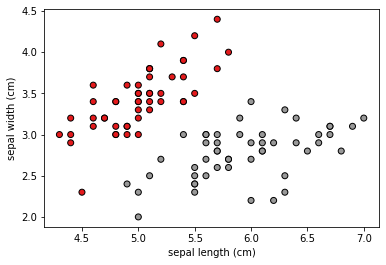

In [10]:
plot_iris(X[:, 0], X[:, 1], Y, iris.feature_names[0], iris.feature_names[1])

In [38]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

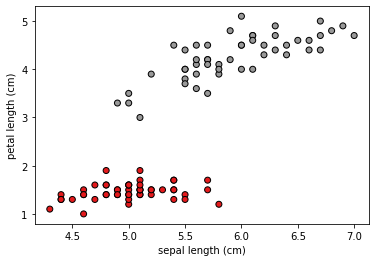

In [854]:
plot_iris(X[:, 0], X[:, 2], Y, iris.feature_names[0], iris.feature_names[2])

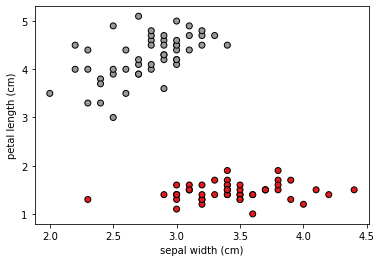

In [855]:
plot_iris(X[:, 1], X[:, 2], Y, iris.feature_names[1], iris.feature_names[2])

Text(0.5, 0, 'petal length (cm)')

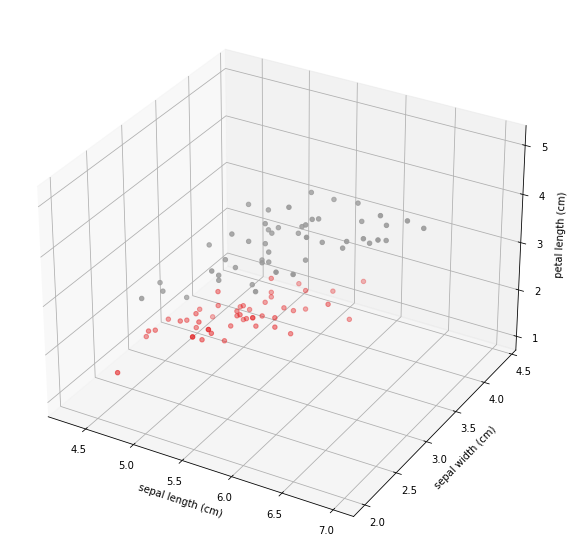

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:,1], X[:,2], c=Y, cmap=plt.cm.Set1 )
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :3], Y, test_size= 0.2)

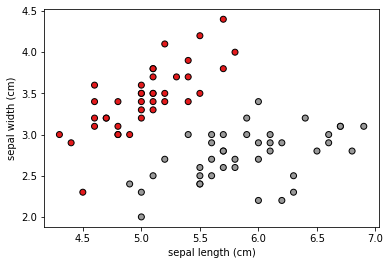

In [16]:
plot_iris(X_train[:,0],X_train[:,1], y_train, iris.feature_names[0], iris.feature_names[1])

In [17]:
percep_iris = Perceptron(input_length=X_train.shape[1], eta=0.1, activ_f=step_function, epochs=1000)

In [18]:

# Make data.
XX = np.arange(2, 7, 0.1)
YY = np.arange(2, 7, 0.1)
XX, YY = np.meshgrid(XX, YY)
# projection of the plane
Z = -(1/percep_iris.weights[3])*(percep_iris.weights[0]*XX + percep_iris.weights[1]*YY + percep_iris.weights[2])

Text(0.5, 0, 'petal length (cm)')

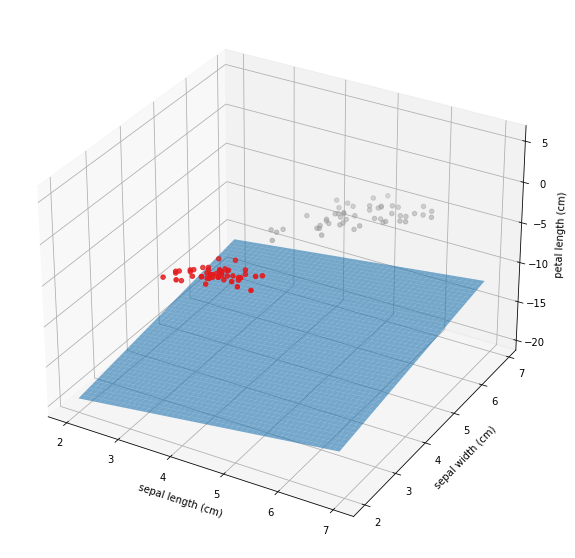

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:,1], X[:,2], c=Y, cmap=plt.cm.Set1, zdir='y' )

ax.plot_surface(XX, YY, Z, alpha=0.6)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')

## Train and Replot

In [20]:
percep_iris.train(X_train, y_train)

In [26]:

# Make data.
XX = np.arange(2, 7, 0.1)
YY = np.arange(2, 7, 0.1)
XX, YY = np.meshgrid(XX, YY)
# projection of the plane
Z = -(1/percep_iris.trained_weights[3])*(percep_iris.trained_weights[0]*XX + percep_iris.trained_weights[1]*YY + percep_iris.trained_weights[2])

Text(0.5, 0, 'petal length (cm)')

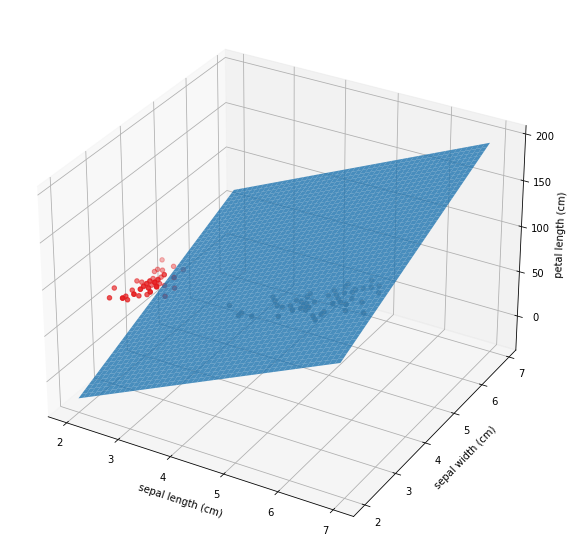

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:,1], X[:,2], c=Y, cmap=plt.cm.Set1, zdir='x' )

ax.plot_surface(XX, YY, Z, alpha=0.8)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')


In [106]:
percep_iris.predict(X_test, y_test)

In [80]:
percep_iris.accuracy

1.0